# Bang For Your Buck: MLB Edition

## By : Rated R^2 (Matthew Phillips, Jacob Laundroche, Esther Shin, Gerrad , Jackson )

### Research Question: 
Are position players on higher salaries actually performing better as hitters? If so, which batting statistics are most telling in how much a player is getting paid?

### Background Information

   ####    For this project, our group, Rated R^2, analyzed Sean Lahman's baseball datasets in order to deeper evaluate the game of baseball. After battling with deciding where to take our research, we decided to focus on one of the hottest topics in Major League Baseball right now, money. This offseason some players, like Bryce Harper, Mike Trout, and Manny Machado, signed contracts for 300+ million dollars. With that in mind,  we wanted to see if some players are really as valuable as they seem. For this reason, our data focuses on the batting attributes of every position player from the 2007-2016 seasons in order for us to evaluate their salaries. Because baseball data is recorded at every baseball game, we are able to look at players from all 30 teams from both the American League and National League Divisions that comprise Major Leage Baseball over each regular season, 162 games, in order to draw conclusions about which salary range of players are worth the money.
   ####   Baseball is a game played between 2 teams with 9 players playing at a time on each team. Each player plays a different position on the field, Pitcher, Catcher, Third Base, Shortstop, Second Base, First Base, Right Field, Center Field, and Left Field. While one team plays the field, the opposing team is on offense or hitting/batting. There are 9 innings in a Major League Baseball game with each team receiving an opportunity to bat in each inning. Each player or batter on the offensive team has an opportunity to reach base where they recieve pitches from the pitcher and attempt to hit the ball or get on base a different way. It is importnat to note here that pitchers typically are poor hitters, and in the American League, someone is allowed to hit for them in the game (this is called a DH or designated hitter). A batter receives pitches from the pitcher that either lead to a strikeout, walk, hit, out, error, sacrifice, or hit-by-pitch. A strikeout is recorded if the pitcher successfully throws the batter three strikes without the batter hitting the third strike. A walk is recorded if the pitcher throws 4 balls before throwing 3 strikes in which the batter is allowed to go to first base. A hit is recorded if the batter makes contact with ball in the field of play and the defensive team is unable to field the ball without making an error. An out is recorded if the batter hits a ball and the defense successfully field the ball causing the player to be out. With three outs, the teams switch from offense to defense (this occurs 18 times in a Major League Baseball game). An error is recorded if the defensive team has a chance to field the ball after the batter has hit the ball, yet they poorly execute the play and the hitter still reaches base safely. A sacrifice is when a batter hits a ball which results in an out, yet a runner on a base advances to the next base. A hit-by-pitch is recorded if a pitcher hits a batter with his pitch; this allows the batter to take first base. When a batter gets on base, he now becomes a runner and tries to touch all four bases before his/her team receives three outs. If at anytime, a batter helps a runner on base score a run, the batter receives an RBI, run-batted-in. Everytime a batter receives an out, error, hit, or strikeout a batter receives an At Bat (‘AB’ in this dataset); walks, sacrifices, and hit-by-pitch do not count for an ‘AB’ for a batter. With this basis of understanding, we trimmed down our data to incorporate these hitting statistics to help look at salary for players. 
   ####    In order to get more specific hitting stats, we broke hits down into doubles, triples and homeruns. A double is anytime a player gets a hit and is able to reach second base before the defense can successfully field the ball with no errors. Similarly, a triple is anytime a batter gets to third base without the fielders being able to make a play with no errors on the ball. Finally, a homerun is when a player either hits the ball out of the park, or is able to touch all four bases before the fielders are able to make a play on the ball with no errors.
   ####    Using these hitting statistics for a batter, we created new variables that would better suit our analysis. In order to see how many hits a player averages per at bat, we divided the hits variable by the ‘AB’ variable to get batting average or ‘BA’ in our data. Next, we created ‘BBAB’ which is base-on-balls or walks per ‘AB’. Then, we created ‘TRAB’,  triples per ‘AB’, ‘DOAB’, doubles per ‘AB’, ‘RBIAB, RBIs per ‘AB’, ‘HRAB’, homeruns per ‘AB’, and  ‘SOAB’, strikeouts per ‘AB’. 
   ####    This dataset we created by merging several of Lahman’s baseball datasets includes the above variables along with ‘salary’ and ‘G_all’ and ‘playerID’ which were also very important in our analysis. The ‘salary’ variable is how much money each player represented by their ‘playerID’ made each year from 2007-2016. We used this variable to create a new variable called ‘quartile’ where we broke up the salaries of players into 4 groups (lowest salary to highest salary quartiles) that we found useful for further analysis for our researche question.  The ‘G_all’ variable shows how many times a player appeared in a game in a year. 
   ####    From all of this data, we were able to create a way to evaluate hitting attributes and how they tell a story about salaries in baseball. Unsurprisingly, with the vast amount of data available on baseball and with the lack of a salary cap in the MLB, studies trying to relate the two have taken place. One such study comes from the International Journal of Sports Studies. This study, by Hoffman and Magel, focused on both pitcher and position players, looking at them separately by yearly and career statistics. With their models, they appeared to have the most success in trying to predict the salaries of position players and depending on whether yearly or career statistics were being analyzed, different player attributes became more important. For example, hitting statistics were more important when looking at yearly data while variables like position and year became more important in career statistics. This study served as a jumping off point when trying to find what variables to focus on in the exploratory phase of our report.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf

In [2]:
batting = pd.read_csv("~jacob/OneDrive/Documents/2019-sp-stats131-master/Batting.csv")
salaries = pd.read_csv("~jacob/OneDrive/Documents/2019-sp-stats131-master/Salaries.csv")
appear = pd.read_csv("~jacob/OneDrive/Documents/2019-sp-stats131-master/Appearances.csv")
fielding = pd.read_csv("~jacob/OneDrive/Documents/2019-sp-stats131-master/Fielding.csv")

#### The following two merges merge the batting statistics, game appearances data, and the salaries for players in the data.  Each row represents a players statistics from a specific year.  If a player is traded in the middle of a season, the player will be listed twice for the same season.

In [3]:
baseball = batting.merge(right = appear, on=["yearID", "playerID", "teamID", "lgID"])
baseball.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0,0,1,0,0,0,0,0.0,0.0,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,22,0,3,0,0,0,0,0.0,0.0,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,2,0,0,0,29,0,29,0.0,0.0,0.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,0,0,0,0,0,0,0,0.0,0.0,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,2,20,0,1,0,0,1,0.0,0.0,0.0


In [4]:
baseball = baseball.merge(right = salaries, on=["yearID", "playerID", "teamID", "lgID"])
baseball.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr,salary
0,ackerji01,1985,1,TOR,AL,61,0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,170000
1,agostju01,1985,1,CHA,AL,54,0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,147500
2,aguaylu01,1985,1,PHI,NL,91,165,27,46,7,...,7,60,0,0,0,0,0.0,11.0,9.0,237000
3,alexado01,1985,1,TOR,AL,36,0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,875000
4,allenne01,1985,1,SLN,NL,23,2,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,750000


#### The following line keeps only the data of players from 2007 on (which goes to 2016 for the fully merged data).  We decided to look at 10 years of data.  The reason we didn't do more years than that is because of inflation and thus the increasing salaries throughout the years.  This could play a small factor even in these 10 years as contracts continue to increase, but we figured that the effect is small enough for the scope of this project.

In [5]:
baseball = baseball.loc[baseball.yearID > 2006]
baseball.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr,salary
17394,aardsda01,2007,1,CHA,AL,25,0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,387500
17395,abreubo01,2007,1,NYA,AL,158,605,123,171,40,...,0,0,0,0,157,157,1.0,4.0,1.0,15000000
17396,accarje01,2007,1,TOR,AL,64,0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,392200
17397,affelje01,2007,1,COL,NL,75,0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,1250000
17398,alfonan01,2007,1,PHI,NL,61,1,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,380000


#### We then took out all of the pitchers.  Although pitchers hit in National League hosted games, pitchers are not paid to hit and have historically been known to for the most part be bad hitters.  So for these reasons, we take them out of our analysis.

In [6]:
baseball = baseball.loc[baseball.G_p < 2]
#baseball.shape

#### We then split the games played into 4 quartiles so that we could get an idea of how the games played distribution was like.  We came to the conclusion that we would keep all of the observations in which a player played at least 105 of the 162 games in the regular season.  We chose this because it allowed us to keep 50% of the data while only keeping players that played a large portion of the season.  This will also take out outliers for say a guy who batted 6 for 8 in a season (0.750 batting average) but who had a season ending injury in the first week of the season.  This will also help keep the distributions of the statistics relatively normal since each statistic (say batting average) has a lot of obersvations.  We are left with 2107 obervations which is plenty.  

In [7]:
baseball['G_all'].quantile([0,.25,.5,.75,1])

0.00      1.0
0.25     64.0
0.50    105.0
0.75    140.0
1.00    163.0
Name: G_all, dtype: float64

In [8]:
baseball = baseball.loc[baseball.G_all >= 105]
baseball.shape

(2107, 40)

#### We next split the remaining 2107 obervations into 4 quartiles based on salary (quartile 1 being the 25% of players with the lowest salary and quartile 4 being the 25% of players with the highest salary).  We do this so that we can compare several batting statistics across quartile groups of salaries so that we can get an idea of whether higher paid players are actually producing more at the plate than thier lower paid counterparts.  

In [9]:
baseball['salary'].quantile([.25,.5,.75,1])
Q1 = baseball['salary'].quantile([.25,.5,.75,1])[0.25]
Q2 = baseball['salary'].quantile([.25,.5,.75,1])[0.5]
Q3 = baseball['salary'].quantile([.25,.5,.75,1])[0.75]
Q4 = baseball['salary'].quantile([.25,.5,.75,1])[1]

baseball_1st = baseball.loc[baseball.salary <= Q1]
baseball_2nd = baseball.loc[baseball.salary <= Q2].loc[baseball.salary > Q1]
baseball_3rd = baseball.loc[baseball.salary <= Q3].loc[baseball.salary > Q2]
baseball_4th = baseball.loc[baseball.salary > Q3 ]
print(baseball_4th.shape)
print(baseball_3rd.shape)
print(baseball_2nd.shape)
print(baseball_1st.shape)

(527, 40)
(526, 40)
(524, 40)
(530, 40)


#### We see from the barplot below that the number of at bats for each quartile is different.  This was a problem in our minds because statistics such as homeruns would most likely be higher in quartiles that had more at bats since they had more chances to hit them.  Because of this, we decided to divide our statistics by the number of at bats so that this was no longer an issue.

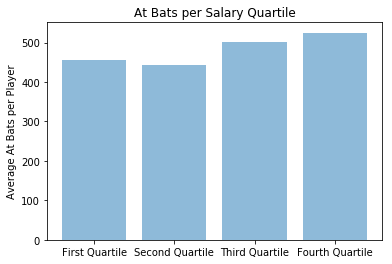

In [10]:
objects = ('First Quartile', 'Second Quartile', 'Third Quartile', 'Fourth Quartile')
y_pos = np.arange(len(objects))
performance = [baseball_1st.AB.mean(),baseball_2nd.AB.mean(),baseball_3rd.AB.mean(),baseball_4th.AB.mean()]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Average At Bats per Player')
plt.title('At Bats per Salary Quartile')

plt.show()

#### As discussed above we divided the batting statistics that we liked by number of at bats so that one quartile didn't have more or less opportunities than another.  The new per at bat variables are constructed below.

In [11]:
baseball["BA"] = baseball.H/baseball.AB
baseball["HRAB"] = baseball.HR/baseball.AB
baseball["TRAB"] = baseball["3B"]/baseball.AB
baseball["DOAB"] = baseball["2B"]/baseball.AB
baseball["RBIAB"] = baseball.RBI/baseball.AB
baseball["BBAB"] = baseball.BB/baseball.AB
baseball["SOAB"] = baseball.SO/baseball.AB
baseball = baseball.reset_index(drop=True)
quart = []
for i in range(0,len(baseball.salary)):
    if baseball.salary[i] <= Q1:
        quart.append(1)
    elif baseball.salary[i] <= Q2:
        quart.append(2)
    elif baseball.salary[i] <= Q3:
        quart.append(3)
    else:
        quart.append(4)
baseball["quartile"] = quart
baseball123 = baseball.loc[baseball.quartile <4]
baseball12 = baseball.loc[baseball.quartile <3]
baseball.head()

baseball_1st = baseball.loc[baseball.salary <= Q1]
baseball_2nd = baseball.loc[baseball.salary <= Q2].loc[baseball.salary > Q1]
baseball_3rd = baseball.loc[baseball.salary <= Q3].loc[baseball.salary > Q2]
baseball_4th = baseball.loc[baseball.salary > Q3 ]


#### Below are the histogram distributions for our variables that we are going to use.  They all appear approximately normal except for triples.  We will thus use averages for all statistics except use the median for triples.  There are no visibly alarming outliers in the data which is what we expected since we took players that played at least 105 games.

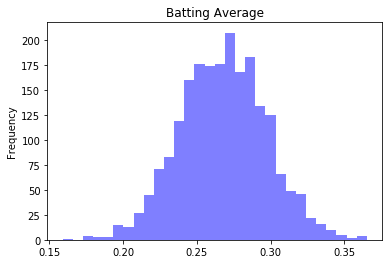

In [12]:
num_bins = 30
n, bins, patches = plt.hist(baseball.BA, num_bins, facecolor='blue', alpha=0.5)
plt.ylabel('Frequency')
plt.title('Batting Average')
plt.show()

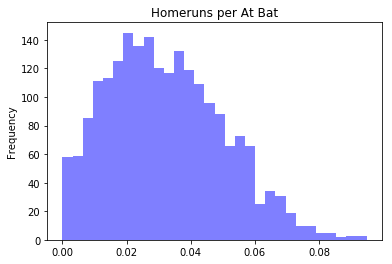

In [13]:
num_bins = 30
n, bins, patches = plt.hist(baseball.HRAB, num_bins, facecolor='blue', alpha=0.5)
plt.ylabel('Frequency')
plt.title('Homeruns per At Bat')
plt.show()

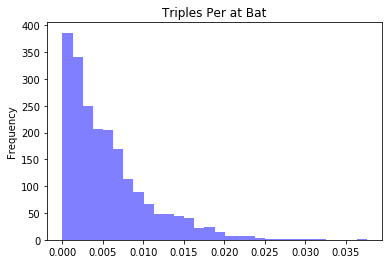

In [14]:
num_bins = 30
n, bins, patches = plt.hist(baseball.TRAB, num_bins, facecolor='blue', alpha=0.5)
plt.ylabel('Frequency')
plt.title('Triples Per at Bat')
plt.show()

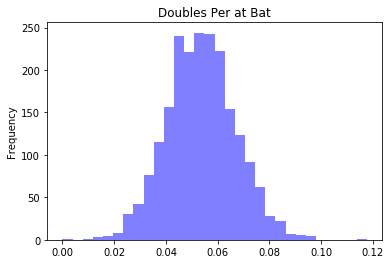

In [15]:
num_bins = 30
n, bins, patches = plt.hist(baseball.DOAB, num_bins, facecolor='blue', alpha=0.5)
plt.ylabel('Frequency')
plt.title('Doubles Per at Bat')
plt.show()

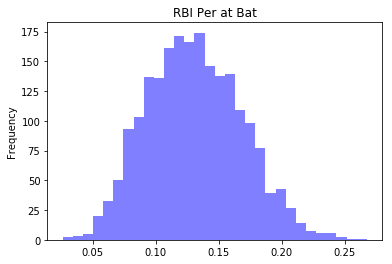

In [16]:
num_bins = 30
n, bins, patches = plt.hist(baseball.RBIAB, num_bins, facecolor='blue', alpha=0.5)
plt.ylabel('Frequency')
plt.title('RBI Per at Bat')
plt.show()

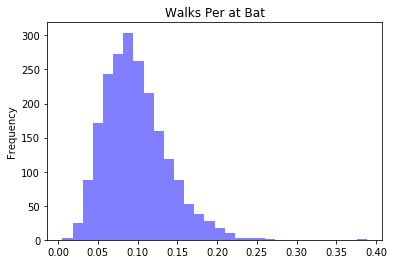

In [17]:
num_bins = 30
n, bins, patches = plt.hist(baseball.BBAB, num_bins, facecolor='blue', alpha=0.5)
plt.ylabel('Frequency')
plt.title('Walks Per at Bat')
plt.show()

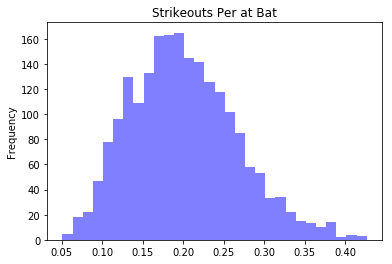

In [18]:
num_bins = 30
n, bins, patches = plt.hist(baseball.SOAB, num_bins, facecolor='blue', alpha=0.5)
plt.ylabel('Frequency')
plt.title('Strikeouts Per at Bat')
plt.show()

In [19]:
baseball.shape

(2107, 48)

#### The fact that the following two plots of both the average homeruns per quartile and median homeruns per quartile are similar in shape is on par with our expectation that the distribution of these statistics will be approximately normal since each statistic comprises of a player playing in at least 105 games.

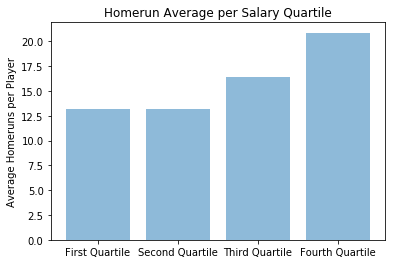

In [20]:
objects = ('First Quartile', 'Second Quartile', 'Third Quartile', 'Fourth Quartile')
y_pos = np.arange(len(objects))
performance = [baseball_1st.HR.mean(),baseball_2nd.HR.mean(),baseball_3rd.HR.mean(),baseball_4th.HR.mean()]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Average Homeruns per Player')
plt.title('Homerun Average per Salary Quartile')

plt.show()


In [21]:
d= {'Homerun Average per Player' : [baseball_1st.HR.mean(),baseball_2nd.HR.mean(),baseball_3rd.HR.mean(),baseball_4th.HR.mean()], 'Quartile':[1,2,3,4]}
df2 =pd.DataFrame(d, columns=['Quartile', 'Homerun Average per Player'])
df2  

,Quartile,Homerun Average per Player
0,1,13.194340
1,2,13.185115
2,3,16.385932
3,4,20.865275


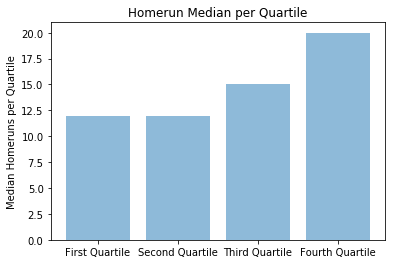

In [22]:
objects = ('First Quartile', 'Second Quartile', 'Third Quartile', 'Fourth Quartile')
y_pos = np.arange(len(objects))
performance = [baseball_1st.HR.median (),baseball_2nd.HR.median(),baseball_3rd.HR.median(),baseball_4th.HR.median()]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Median Homeruns per Quartile')
plt.title('Homerun Median per Quartile')

plt.show()

In [23]:
d= {'Homerun Median per Player' : [baseball_1st.HR.median(),baseball_2nd.HR.median(),baseball_3rd.HR.median(),baseball_4th.HR.median()], 'Quartile':[1,2,3,4]}
df2 =pd.DataFrame(d, columns=['Quartile', 'Homerun Median per Player'])
df2  

,Quartile,Homerun Median per Player
0,1,12.0
1,2,12.0
2,3,15.0
3,4,20.0


#### The following is a table that confirms the disparity in number of bats for different salary quartiles of players.

In [24]:
d= {'Average At Bats per Player' : [baseball_1st.AB.mean(),baseball_2nd.AB.mean(),baseball_3rd.AB.mean(),baseball_4th.AB.mean()], 'Quartile':[1,2,3,4]}
df2 =pd.DataFrame(d, columns=['Quartile', 'Average At Bats per Player'])
df2  

,Quartile,Average At Bats per Player
0,1,455.371698
1,2,444.038168
2,3,500.969582
3,4,525.009488


#### Below we have the mean batting average for players in each salary quartile.  There doesn't appear to be a huge disparity except it appears that the 4th quartile players are hitting noticeably higher.  The 2nd quartile has the lowest batting average of all of the groups.  We explore further.

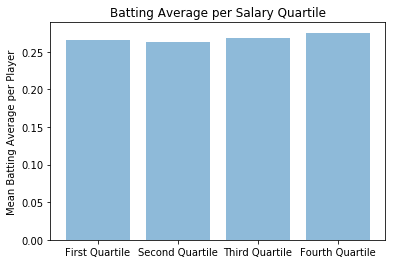

In [25]:
objects = ('First Quartile', 'Second Quartile', 'Third Quartile', 'Fourth Quartile')
y_pos = np.arange(len(objects))
performance = [baseball_1st.BA.mean(),baseball_2nd.BA.mean(),baseball_3rd.BA.mean(),baseball_4th.BA.mean()]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Mean Batting Average per Player')
plt.title('Batting Average per Salary Quartile')

plt.show()

In [26]:
d= {'Mean Batting Average per Player' : [baseball_1st.BA.mean(),baseball_2nd.BA.mean(),baseball_3rd.BA.mean(),baseball_4th.BA.mean()], 'Quartile':[1,2,3,4]}
df2 =pd.DataFrame(d, columns=['Quartile', 'Mean Batting Average per Player'])
df2                 

,Quartile,Mean Batting Average per Player
0,1,0.265020
1,2,0.262409
2,3,0.268680
3,4,0.275287


#### We run an ANOVA test to see if the means of the 4 quartiles are the same.  The low p value shows that there is statistical significance to believe that the means aren't all the same.  This is isn't suprising given the 4th quartile having a noticeably higher batting average than the other 3 quartiles.  This shows that on average the guys getting the big bucks are producing at the plate from a batting average standpoint at a higher level than their lower paid teammates.  

In [27]:
model = ols('BA ~ quartile', data = baseball).fit()
aov = sm.stats.anova_lm(model, typ=2)
print(aov)

            sum_sq      df          F        PR(>F)
quartile  0.036162     1.0  42.776853  7.678736e-11
Residual  1.779510  2105.0        NaN           NaN


#### We run another ANOVA comparing just the first 3 quartile means and while the p value is still significant at the 0.05 alpha level, it is much higher than the test comparing all 4 quartile means.  This may be a beginning sign that quartile 3 players aren't all that much more valuable than quartile 1 and 2 players at the plate for batting average purposes (one of the most important if not the most important statistic in hitting in baseball). 

In [28]:
model = ols('BA ~ quartile', data = baseball123).fit()
aov = sm.stats.anova_lm(model, typ=2)
print(aov) 

            sum_sq      df         F    PR(>F)
quartile  0.003515     1.0  4.413735  0.035809
Residual  1.256718  1578.0       NaN       NaN


#### A test between just the 1st and 2nd quartile show that there is not statistically significant evidence to believe the batting average means of 1st and 2nd quartile salary players is different.

In [29]:
model = ols('BA ~ quartile', data = baseball12).fit()
aov = sm.stats.anova_lm(model, typ=2)
print(aov) 

            sum_sq      df        F    PR(>F)
quartile  0.001796     1.0  2.27715  0.131593
Residual  0.829789  1052.0      NaN       NaN


#### Homeruns have always been an extremely important statistic in baseball, especially in the recent age of advanced analytics in baseball.  A lot of baseball analysts today agree that a guy that hits a significant amount of homeruns but a lower batting average is more valuable to a team than a guy with a better batting average but less homeruns.  These statistics are on par with this recent trend.  The 4th quartile players are hitting a significant amount of homeruns per at bat than the lower quartiles and the 3rd quartile is clearly behind them over the 1st and 2nd quartile salary guys.  The ANOVA tests reflect this but we once again see that there isn't a significant difference between the 1st and 2nd quartile salary players.

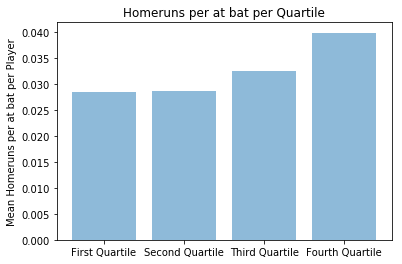

In [30]:
objects = ('First Quartile', 'Second Quartile', 'Third Quartile', 'Fourth Quartile')
y_pos = np.arange(len(objects))
performance = [baseball_1st.HRAB.mean(),baseball_2nd.HRAB.mean(),baseball_3rd.HRAB.mean(),baseball_4th.HRAB.mean()]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Mean Homeruns per at bat per Player')
plt.title('Homeruns per at bat per Quartile')

plt.show()

In [31]:
d= {'Homeruns per At Bat per Player' : [baseball_1st.HRAB.mean(),baseball_2nd.HRAB.mean(),baseball_3rd.HRAB.mean(),baseball_4th.HRAB.mean()], 'Quartile':[1,2,3,4]}
df2 =pd.DataFrame(d, columns=['Quartile', 'Homeruns per At Bat per Player'])
df2    

,Quartile,Homeruns per At Bat per Player
0,1,0.028322
1,2,0.028635
2,3,0.032398
3,4,0.039805


In [32]:
model = ols('HR ~ quartile', data = baseball).fit()
aov = sm.stats.anova_lm(model, typ=2)
print(aov)

                 sum_sq      df          F        PR(>F)
quartile   18108.403103     1.0  200.28204  1.676558e-43
Residual  190322.549910  2105.0        NaN           NaN


In [33]:
model = ols('HR ~ quartile', data = baseball123).fit()
aov = sm.stats.anova_lm(model, typ=2)
print(aov) 

                 sum_sq      df          F        PR(>F)
quartile    2682.355391     1.0  31.495865  2.356855e-08
Residual  134390.871825  1578.0        NaN           NaN


In [34]:
model = ols('HR ~ quartile', data = baseball12).fit()
aov = sm.stats.anova_lm(model, typ=2)
print(aov) 

                sum_sq      df         F    PR(>F)
quartile      0.022424     1.0  0.000269  0.986918
Residual  87708.026912  1052.0       NaN       NaN


#### The triples has an interesting trend.  Triples are not a large part of the game just in the sense that they are relatively rare.  It is interesting to see that the number of triples per at bat though is highest from the quartile 1 salary players and decreases with each quartile all the way down to quartile 4.  We hypothesize that the quartile 1 players likely have the most triples because they are probably on their rookie contract and are very young and quick enough to fly around the bases and get a triple more so than the older players in later contracts.  The ANOVA tests for all, the lower 3, and the lowest 2 quartiles all have significant p values.  

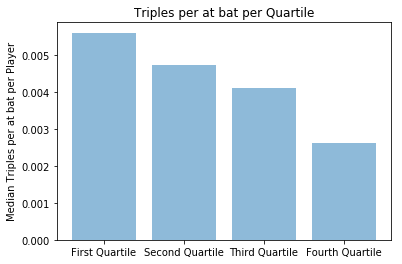

In [35]:
objects = ('First Quartile', 'Second Quartile', 'Third Quartile', 'Fourth Quartile')
y_pos = np.arange(len(objects))
performance = [baseball_1st.TRAB.median(),baseball_2nd.TRAB.median(),baseball_3rd.TRAB.median(),baseball_4th.TRAB.median()]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Median Triples per at bat per Player')
plt.title('Triples per at bat per Quartile')

plt.show()




In [36]:
d= {'Triples per At Bat per Player' : [baseball_1st.TRAB.median(),baseball_2nd.TRAB.median(),baseball_3rd.TRAB.median(),baseball_4th.TRAB.median()], 'Quartile':[1,2,3,4]}
df2 =pd.DataFrame(d, columns=['Quartile', 'Triples per At Bat per Player'])
df2 

,Quartile,Triples per At Bat per Player
0,1,0.005605
1,2,0.004734
2,3,0.004098
3,4,0.002618


In [37]:
model = ols('TRAB ~ quartile', data = baseball).fit()
aov = sm.stats.anova_lm(model, typ=2)
print(aov)

            sum_sq      df           F        PR(>F)
quartile  0.002795     1.0  106.628099  2.032618e-24
Residual  0.055178  2105.0         NaN           NaN


In [38]:
model = ols('TRAB ~ quartile', data = baseball123).fit()
aov = sm.stats.anova_lm(model, typ=2)
print(aov) 

            sum_sq      df          F        PR(>F)
quartile  0.000941     1.0  32.329529  1.547543e-08
Residual  0.045925  1578.0        NaN           NaN


In [39]:
model = ols('TRAB ~ quartile', data = baseball12).fit()
aov = sm.stats.anova_lm(model, typ=2)
print(aov) 

            sum_sq      df         F    PR(>F)
quartile  0.000276     1.0  8.746339  0.003172
Residual  0.033211  1052.0       NaN       NaN


#### Doubles are much more common than triples in baseball and at first look it appears as though the quartiles are rather comparable in terms of doubles.  Quartiles 1, 3, and 4 are very close while quartile 2 is the lowest.  Once again, we see quartile 1 outperforming quartile 2 which is becomming an interesting trend.  

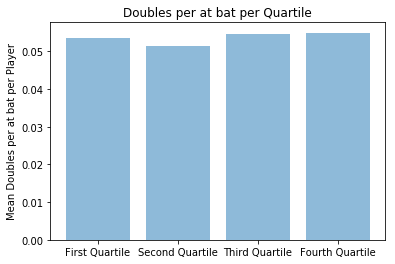

In [40]:
objects = ('First Quartile', 'Second Quartile', 'Third Quartile', 'Fourth Quartile')
y_pos = np.arange(len(objects))
performance = [baseball_1st.DOAB.mean(),baseball_2nd.DOAB.mean(),baseball_3rd.DOAB.mean(),baseball_4th.DOAB.mean()]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Mean Doubles per at bat per Player')
plt.title('Doubles per at bat per Quartile')

plt.show()




In [41]:
d= {'Doubles per At Bat per Player' : [baseball_1st.DOAB.mean(),baseball_2nd.DOAB.mean(),baseball_3rd.DOAB.mean(),baseball_4th.DOAB.mean()], 'Quartile':[1,2,3,4]}
df2 =pd.DataFrame(d, columns=['Quartile', 'Doubles per At Bat per Player'])
df2 

,Quartile,Doubles per At Bat per Player
0,1,0.053608
1,2,0.051336
2,3,0.054715
3,4,0.054967


In [42]:
model = ols('DOAB ~ quartile', data = baseball).fit()
aov = sm.stats.anova_lm(model, typ=2)
print(aov)

            sum_sq      df         F    PR(>F)
quartile  0.001456     1.0  8.312283  0.003978
Residual  0.368591  2105.0       NaN       NaN


In [43]:
model = ols('DOAB ~ quartile', data = baseball123).fit()
aov = sm.stats.anova_lm(model, typ=2)
print(aov)

            sum_sq      df         F    PR(>F)
quartile  0.000319     1.0  1.813002  0.178342
Residual  0.277563  1578.0       NaN       NaN


In [44]:
model = ols('DOAB ~ quartile', data = baseball12).fit()
aov = sm.stats.anova_lm(model, typ=2)
print(aov) 

            sum_sq      df         F    PR(>F)
quartile  0.001361     1.0  7.329412  0.006893
Residual  0.195325  1052.0       NaN       NaN


#### RBIs are another very important statistic in baseball.  RBIs have a clutch factor involved in that it involves performing at the plate when teammates are in scoring position.  Clutchness is often tough to measure but RBIs provide a little bit of insight on this.  Like the other important statistics that we have mentioned, the 4th quartile players are performing at a significantly higher level and the 3rd quartile are clearly performing the 2nd best.  And once again, the first quartile players are outperforming the 2nd quartile players, but not at a statistically significant level for RBI.

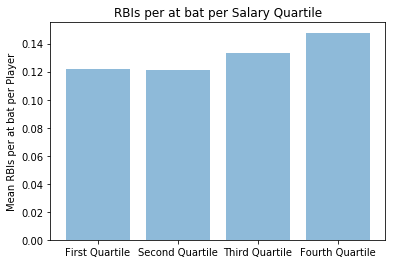

In [45]:
objects = ('First Quartile', 'Second Quartile', 'Third Quartile', 'Fourth Quartile')
y_pos = np.arange(len(objects))
performance = [baseball_1st.RBIAB.mean(),baseball_2nd.RBIAB.mean(),baseball_3rd.RBIAB.mean(),baseball_4th.RBIAB.mean()]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Mean RBIs per at bat per Player')
plt.title('RBIs per at bat per Salary Quartile')

plt.show()




In [46]:
d= {'RBIs per At Bat per Player' : [baseball_1st.RBIAB.mean(),baseball_2nd.RBIAB.mean(),baseball_3rd.RBIAB.mean(),baseball_4th.RBIAB.mean()], 'Quartile':[1,2,3,4]}
df2 =pd.DataFrame(d, columns=['Quartile', 'RBIs per At Bat per Player'])
df2 

,Quartile,RBIs per At Bat per Player
0,1,0.121651
1,2,0.120992
2,3,0.133146
3,4,0.147784


In [47]:
model = ols('RBIAB ~ quartile', data = baseball).fit()
aov = sm.stats.anova_lm(model, typ=2)
print(aov)

            sum_sq      df           F        PR(>F)
quartile  0.216049     1.0  165.801366  1.413392e-36
Residual  2.742940  2105.0         NaN           NaN


In [48]:
model = ols('RBIAB ~ quartile', data = baseball123).fit()
aov = sm.stats.anova_lm(model, typ=2)
print(aov)

            sum_sq      df          F        PR(>F)
quartile  0.034782     1.0  27.879374  1.470946e-07
Residual  1.968706  1578.0        NaN           NaN


In [49]:
model = ols('RBIAB ~ quartile', data = baseball12).fit()
aov = sm.stats.anova_lm(model, typ=2)
print(aov) 

            sum_sq      df         F    PR(>F)
quartile  0.000114     1.0  0.090285  0.763874
Residual  1.333916  1052.0       NaN       NaN


#### Higher paid players are getting walked more often, followed significantly by 3rd quartile players.  This makes sense because often times pitchers will pitch around good hitters or even intentionally walk them (throw 4 balls in a row on purpose).  1st and 2nd quartile salary players have no significant difference.

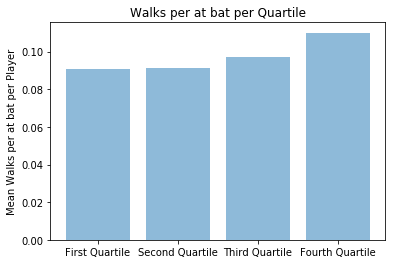

In [50]:
objects = ('First Quartile', 'Second Quartile', 'Third Quartile', 'Fourth Quartile')
y_pos = np.arange(len(objects))
performance = [baseball_1st.BBAB.mean(),baseball_2nd.BBAB.mean(),baseball_3rd.BBAB.mean(),baseball_4th.BBAB.mean()]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Mean Walks per at bat per Player')
plt.title('Walks per at bat per Quartile')

plt.show()




In [51]:
d= {'Walks per At Bat per Player' : [baseball_1st.BBAB.mean(),baseball_2nd.BBAB.mean(),baseball_3rd.BBAB.mean(),baseball_4th.BBAB.mean()], 'Quartile':[1,2,3,4]}
df2 =pd.DataFrame(d, columns=['Quartile', 'Walks per At Bat per Player'])
df2 

,Quartile,Walks per At Bat per Player
0,1,0.090989
1,2,0.091516
2,3,0.097253
3,4,0.110064


In [52]:
model = ols('BBAB ~ quartile', data = baseball).fit()
aov = sm.stats.anova_lm(model, typ=2)
print(aov)

            sum_sq      df          F        PR(>F)
quartile  0.104484     1.0  70.019571  1.054980e-16
Residual  3.141109  2105.0        NaN           NaN


In [53]:
model = ols('BBAB ~ quartile', data = baseball123).fit()
aov = sm.stats.anova_lm(model, typ=2)
print(aov)

            sum_sq      df         F    PR(>F)
quartile  0.010335     1.0  7.932754  0.004915
Residual  2.055916  1578.0       NaN       NaN


In [54]:
model = ols('BBAB ~ quartile', data = baseball12).fit()
aov = sm.stats.anova_lm(model, typ=2)
print(aov) 

            sum_sq      df         F    PR(>F)
quartile  0.000073     1.0  0.058398  0.809094
Residual  1.314813  1052.0       NaN       NaN


#### Now we look at strikeouts per at bat, a statistic you do not want to be leading.  This statistic falls directly in place with the quartiles in that 1st quartile players are striking out at the highest rate all the way down to 4th quartile players striking out the least, all at statistically significant levels.

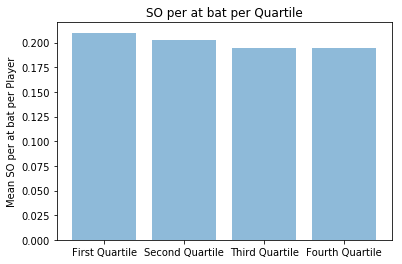

In [55]:
objects = ('First Quartile', 'Second Quartile', 'Third Quartile', 'Fourth Quartile')
y_pos = np.arange(len(objects))
performance = [baseball_1st.SOAB.mean(),baseball_2nd.SOAB.mean(),baseball_3rd.SOAB.mean(),baseball_4th.SOAB.mean()]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Mean SO per at bat per Player')
plt.title('SO per at bat per Quartile')

plt.show()

In [56]:
d= {'Strikeout per At Bat per Player' : [baseball_1st.SOAB.mean(),baseball_2nd.SOAB.mean(),baseball_3rd.SOAB.mean(),baseball_4th.SOAB.mean()], 'Quartile':[1,2,3,4]}
df2 =pd.DataFrame(d, columns=['Quartile', 'Strikeout per At Bat per Player'])
df2 

,Quartile,Strikeout per At Bat per Player
0,1,0.210060
1,2,0.202689
2,3,0.194049
3,4,0.194835


In [57]:
model = ols('SOAB ~ quartile', data = baseball).fit()
aov = sm.stats.anova_lm(model, typ=2)
print(aov) 

            sum_sq      df          F    PR(>F)
quartile  0.077966     1.0  18.370493  0.000019
Residual  8.933824  2105.0        NaN       NaN


In [58]:
model = ols('SOAB ~ quartile', data = baseball123).fit()
aov = sm.stats.anova_lm(model, typ=2)
print(aov) 

            sum_sq      df          F    PR(>F)
quartile  0.067664     1.0  16.044464  0.000065
Residual  6.654889  1578.0        NaN       NaN


In [59]:
model = ols('SOAB ~ quartile', data = baseball12).fit()
aov = sm.stats.anova_lm(model, typ=2)
print(aov) 

            sum_sq      df         F    PR(>F)
quartile  0.014316     1.0  3.434149  0.064141
Residual  4.385589  1052.0       NaN       NaN


In [60]:
from sklearn import linear_model


In [61]:
baseballPred = baseball[['SOAB', 'BBAB', 'BA', 'HRAB', 'TRAB', 'DOAB', 'RBIAB', 'salary']]

In [62]:
model = smf.ols('salary ~ SOAB + BBAB + BA + HRAB + TRAB + DOAB + RBIAB', data = baseballPred)
results = model.fit()
print(results.summary())
#yhat = model.predict(baseballPred)
#print(yhat)

model = smf.ols('salary ~ BA + HRAB', data = baseballPred)
results = model.fit()
print(results.summary())

model = sm.formula.glm("salary ~ SOAB + BBAB + BA + HRAB + TRAB + DOAB + RBIAB", data=baseballPred).fit()
print(model.summary())

model = sm.formula.glm("salary ~ BA + HRAB + BBAB", data=baseballPred).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     58.64
Date:                Fri, 31 May 2019   Prob (F-statistic):           4.64e-77
Time:                        15:43:38   Log-Likelihood:                -35599.
No. Observations:                2107   AIC:                         7.121e+04
Df Residuals:                    2099   BIC:                         7.126e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.96e+05   1.47e+06      0.133      0.8